<a href="https://colab.research.google.com/github/Yashrjadhav/NLP/blob/main/MiniprojectNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ⚠️ Fix for NumPy and OpenCV compatibility in Google Colab
!pip install numpy==1.23.5 --quiet
!pip uninstall -y opencv-python opencv-python-headless --quiet
!pip install opencv-python-headless==4.8.0.76 --quiet

print("✅ Fix applied. Please restart the runtime (Runtime > Restart Runtime) and then run the next cell.")


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.76 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.76 which is incompatible.
✅ Fix applied. Please restart the runtime (Runtime > Restart Runtime) and then run the next cell.


📁 Please upload 'pokemon_red.png' and 'shapes.png'


Saving pokemon_red.png to pokemon_red.png
Saving shapes.png to shapes.png
🔍 Reference Image:


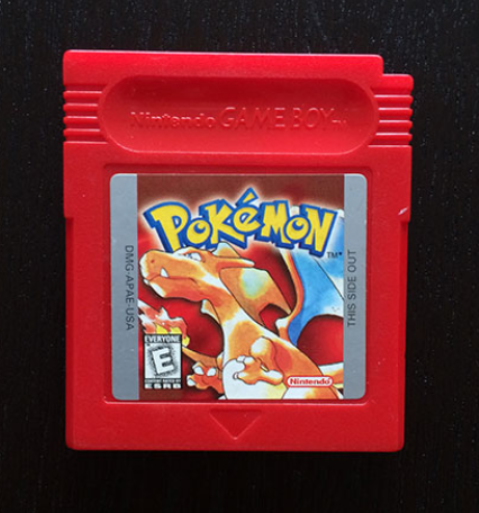

✅ Detected Shape in Green:


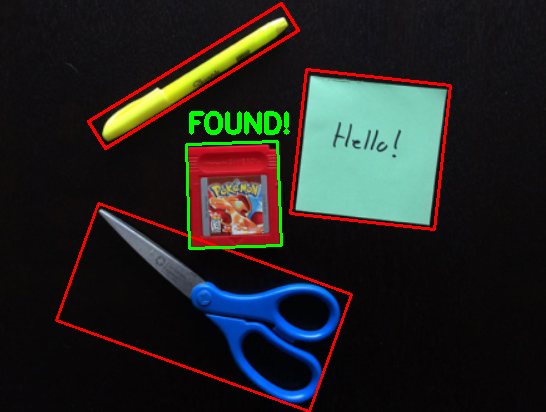

In [2]:
# ✅ Install dependencies again after restart
!pip install mahotas imutils --quiet

from scipy.spatial import distance as dist
import numpy as np
import mahotas
import cv2
from google.colab.patches import cv2_imshow as cvim
import imutils
from google.colab import files

# Upload images
print("📁 Please upload 'pokemon_red.png' and 'shapes.png'")
uploaded = files.upload()

def describe_shapes(image):
    shapeFeatures = []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (13, 13), 0)
    thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=4)
    thresh = cv2.erode(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
        (x, y, w, h) = cv2.boundingRect(c)
        roi = mask[y:y + h, x:x + w]
        radius = cv2.minEnclosingCircle(c)[1]
        features = mahotas.features.zernike_moments(roi, radius, degree=8)
        shapeFeatures.append(features)

    return (cnts, shapeFeatures)

# Load and process images
refImage = cv2.imread("/content/pokemon_red.png")
(_, gameFeatures) = describe_shapes(refImage)
shapesImage = cv2.imread("/content/shapes.png")
(cnts, shapeFeatures) = describe_shapes(shapesImage)

D = dist.cdist(gameFeatures, shapeFeatures)
i = np.argmin(D)

for (j, c) in enumerate(cnts):
    if i != j:
        box = cv2.minAreaRect(c)
        box = cv2.boxPoints(box)
        box = np.int0(box)
        cv2.drawContours(shapesImage, [box], -1, (0, 0, 255), 2)

box = cv2.minAreaRect(cnts[i])
box = cv2.boxPoints(box)
box = np.int0(box)
cv2.drawContours(shapesImage, [box], -1, (0, 255, 0), 2)
(x, y, w, h) = cv2.boundingRect(cnts[i])
cv2.putText(shapesImage, "FOUND!", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3)

print("🔍 Reference Image:")
cvim(refImage)
print("✅ Detected Shape in Green:")
cvim(shapesImage)
